# EDA

In [1]:
# 라이브러리 / 기본셋업

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno

버전 확인

- `python` >= 3.10.12
- `numpy` >= 1.26.0
- `pandas` >= 2.1.1
- `matplotlib` >= 3.8.1
- `seaborn` >= 0.13.0
- `missingno` >= 0.5.2

In [2]:
import sys, matplotlib

print("="*5 ,"라이브러리 버전 확인", "="*5)
print(f"{'python version':15s} <> {sys.version}")
print(f"{'numpy version':15s} <> {np.__version__}")
print(f"{'pandas version':15s} <> {pd.__version__}")
print(f"{'matplotlib version':15s} <> {matplotlib.__version__}")
print(f"{'seaborn version':15s} <> {sns.__version__}")
print(f"{'missingno version':15s} <> {msno.__version__}")

===== 라이브러리 버전 확인 =====
python version  <> 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
numpy version   <> 1.26.3
pandas version  <> 2.1.4
matplotlib version <> 3.8.2
seaborn version <> 0.13.1
missingno version <> 0.5.2


In [3]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
# 혹시 코랩환경을 사용하신다면 왼쪽 폴더모양 아이콘을 눌러 "train_data.csv"를 드래그&드롭으로 업로드한 후 사용해주세요
DATA_PATH = '/data/ephemeral/data/train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)
df.head()

CPU times: user 4.04 s, sys: 599 ms, total: 4.64 s
Wall time: 4.66 s


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


## 1. data 특성

In [4]:
print(f"""--- BASIC INFORMATIONS ---
rowCount         : {len(df)}  
userID           : {df.userID.nunique()}
assessmentItemID : {df.assessmentItemID.nunique()}
testID           : {df.testId.nunique()}
mean answer rate : {df.answerCode.sum() / df.shape[0] * 100:.2f}%
KnowledgeTag     : {df.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
rowCount         : 2266586  
userID           : 6698
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.44%
KnowledgeTag     : 912
--------------------------


+ `rowCount` 데이터프레임 df의 전체 행의 수 2,266,586 
+ `userID` 사용자의 고유 번호입니다. 총 6,698명의 학생이 있습니다.   
+ `assessmentItemID` 사용자가 푼 문항의 일련 번호입니다.   총 9,454개의 고유한 문항이 존재
+ `testId` 사용자가 푼 문항이 포함된 시험지의 일련 번호입니다.   총 1,537개의 고유한 시험지가 존재
+ `answerCode` 사용자가 푼 문항의 정답 여부를 담고 있는 이진 (0/1) 데이터입니다. 전체'Interaction에'대해 65.45%가 정답을 맞춤
+ `Timestamp` 사용자가 문항을 푼 시간 정보입니다.   
+ `KnowledgeTag` 사용자가 푼 문항의 고유 태그가 담겨져 있습니다.   총 912개의 고유 태그가 존재


In [5]:
# 전체  7,442 명  (명시되어 있는 데이터)
# 훈련  6,608 명 (train_data)
# 테스트 744 명 (test_data)

missing_user_ids = set(range(7442)) - set(df['userID'].unique())
missing_user_ids = sorted(missing_user_ids)
print(missing_user_ids)
print(len(missing_user_ids))

[3, 4, 13, 17, 26, 29, 45, 53, 58, 64, 76, 79, 94, 120, 159, 172, 193, 200, 203, 204, 217, 226, 244, 257, 260, 262, 295, 313, 317, 325, 326, 342, 355, 361, 363, 375, 378, 385, 410, 414, 416, 443, 458, 465, 468, 474, 479, 480, 482, 496, 499, 520, 524, 542, 552, 556, 561, 563, 566, 568, 569, 573, 580, 581, 584, 594, 596, 600, 616, 617, 645, 653, 656, 671, 694, 701, 712, 744, 756, 759, 764, 765, 767, 772, 792, 794, 802, 806, 819, 827, 837, 839, 842, 848, 871, 876, 885, 888, 895, 898, 912, 913, 916, 938, 944, 945, 947, 982, 991, 1020, 1022, 1030, 1042, 1044, 1051, 1071, 1072, 1083, 1085, 1100, 1133, 1143, 1148, 1170, 1207, 1208, 1213, 1221, 1252, 1266, 1268, 1273, 1289, 1292, 1295, 1304, 1307, 1310, 1323, 1331, 1332, 1338, 1348, 1352, 1362, 1390, 1401, 1425, 1450, 1462, 1463, 1469, 1503, 1522, 1555, 1557, 1558, 1559, 1569, 1571, 1575, 1582, 1592, 1614, 1628, 1629, 1631, 1634, 1647, 1667, 1673, 1716, 1720, 1721, 1725, 1728, 1735, 1741, 1746, 1750, 1751, 1755, 1763, 1783, 1791, 1796, 1799, 1

---

### 1-1) assessmentItemID 분석

In [6]:
# 첫 번째 단어 A 밖에 없는 것을 확인할 수 있음

df['assessmentItemID'].apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

In [7]:
#### 문항 일련 번호 내 시험지 번호
# 문항 일련 번호의 1-6번째 자리와 시험지 번호의 1-3번째 + 마지막3자리 합이 같은지 확인합니다.   
# 전체 데이터 개수와 일치함을 알 수 있습니다.

# A/030071/005
# testId A/030/000/071

print(sum(df['assessmentItemID'].apply(
    lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:])
))

print(all(df['assessmentItemID'].apply(
    lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:])
))

2266586
True


In [8]:
# 문항별 풀이 개수 확인 - dataframe

df.groupby('assessmentItemID').agg({'assessmentItemID': 'count'}).rename(columns={'assessmentItemID': 'count'}).sort_values(by='count', ascending=False)

,count
assessmentItemID,
A090014004,454
A090014006,454
A090014005,454
A090014003,454
A090014001,454
...,...
A080084002,43
A080084003,43
A090070003,43


In [9]:
# 문항별 풀이 개수 확인 - series
# 전체 9454개의 문항(문제) 풀이 횟수 최소 43 ~ 최대 454
df['assessmentItemID'].value_counts()

assessmentItemID
A090014001    454
A090014002    454
A090014005    454
A090014003    454
A090014006    454
             ... 
A080084001     43
A080084002     43
A080084003     43
A080084004     43
A010180006     43
Name: count, Length: 9454, dtype: int64

In [10]:
# aggregate 
# userID 기준, 집계, assessmentItemID, count 개수 총합

df.groupby('userID').agg({'assessmentItemID': 'count'})

,assessmentItemID
userID,
0,745
1,933
2,276
5,833
6,921
...,...
7436,15
7437,16
7438,16


In [11]:
# aggregate 
# userID 기준, 집계, assessmentItemID, 유니크 개수
#  유저 0의 경우, 745,745로 동일
#  유저 1의 경우, 933, 879 확인, 같은 문제를 중복해서 풀이 한 경우 확인

df.groupby('userID').agg({'assessmentItemID': 'nunique'})

,assessmentItemID
userID,
0,745
1,879
2,276
5,833
6,887
...,...
7436,15
7437,16
7438,16


---

### EDA 1 중복 데이터 

- `userID`별 'count' 와 'nunique'를 비교, 같은 문제를 여러번 푼 경우 확인(중복되는 경우 확인)
- 같은 문제를 풀고, 시간이 지난 후 다시 푸는 경우
    - 0 -> 0
    - 0 -> 1
    - 1 -> 0
    - 1 -> 1


- 시퀀스 데이터 형으로, user id 별로 train 데이터 [유저 A - - - -] 기반

1. 유저 학습 상태 피쳐 (카테고리형)
    - 0 -> 1 : 처음 문제 풀이, 이후, -> 학습 수준++, 해당 부분 학습 완료 o 
    - 1 -> 0 : 처음 문제 풀이, 찍어서 맞춤 -> 학습 수준--, 해당 부분 학습 안함 x
    - 0 -> 0 : 처음 문제 풀이, 그대로, -> 학습 수준--, 해당 부분 학습 안함 x
    - 1 -> 1 : 처음 문제 풀이, 이후, -> 학습 수준++, 해당 부분 학습 완료 o

    - *중복이 아닌 데이터의 학습 수준 처리 고려해야함*

2. 문제 난이도 피쳐 반영 (학습을 하였지만 틀림 -> 어려운 문제, 난이도 반영)
    - 1 -> 0 case -> 어려운 문제
    - 0 -> 0 case -> 어려운 문제


3. 데이터 제거
    - 0 -> 1 : 처음 문제 풀이, 이후, -> 학습 수준++, 해당 부분 학습 완료 o -> last 부분 keep 맞춘 부분만 남김 
    - 1 -> 0 케이스 : 처음 문제 풀이, 찍어서 맞춤 -> 학습 수준--, 해당 부분 학습 안함 x -> last 부분 keep 틀린 부분만 남김

In [12]:
duplicate_items = df[df.duplicated(subset=['userID', 'assessmentItemID', 'testId'], keep=False)]
duplicate_items

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
1166,1,A040155001,A040000155,1,2020-06-21 22:57:14,2111
1167,1,A040155002,A040000155,1,2020-06-21 22:57:55,2111
1168,1,A040155003,A040000155,0,2020-06-21 22:58:33,2111
1169,1,A040155004,A040000155,1,2020-06-21 22:58:49,2111
1170,1,A040155005,A040000155,0,2020-06-21 23:00:10,2111
...,...,...,...,...,...,...
2264852,7329,A040198004,A040000198,1,2020-01-02 12:51:04,2133
2264863,7329,A040198001,A040000198,1,2020-10-12 12:08:49,2133
2264864,7329,A040198002,A040000198,1,2020-10-12 12:08:53,2133
2264865,7329,A040198003,A040000198,1,2020-10-12 12:09:02,2133


In [13]:
# 933 - 879 = 54  
# 54개 중복, 총 108개

duplicate_items[duplicate_items['userID'] == 1]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
1166,1,A040155001,A040000155,1,2020-06-21 22:57:14,2111
1167,1,A040155002,A040000155,1,2020-06-21 22:57:55,2111
1168,1,A040155003,A040000155,0,2020-06-21 22:58:33,2111
1169,1,A040155004,A040000155,1,2020-06-21 22:58:49,2111
1170,1,A040155005,A040000155,0,2020-06-21 23:00:10,2111
...,...,...,...,...,...,...
1472,1,A040164005,A040000164,1,2020-08-27 14:53:40,2122
1479,1,A040165001,A040000165,1,2020-08-28 13:47:10,8836
1480,1,A040165002,A040000165,1,2020-08-28 13:48:20,8836
1481,1,A040165003,A040000165,1,2020-08-28 13:48:30,8836


In [14]:
# 데이터 확인
#    - 0 -> 0
#    - 0 -> 1
#    - 1 -> 0
#    - 1 -> 1

duplicate_items[duplicate_items['assessmentItemID'] == 'A040155005']

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
1170,1,A040155005,A040000155,0,2020-06-21 23:00:10,2111
1401,1,A040155005,A040000155,0,2020-08-17 09:59:40,2111
194715,261,A040155005,A040000155,1,2020-10-13 11:35:26,2111
194761,261,A040155005,A040000155,0,2020-10-23 10:57:36,2111
261556,353,A040155005,A040000155,0,2020-10-14 08:56:19,2111
261604,353,A040155005,A040000155,1,2020-10-23 07:50:51,2111
587598,828,A040155005,A040000155,1,2020-09-21 04:52:04,2111
587724,828,A040155005,A040000155,0,2020-10-22 04:12:43,2111
1944840,3921,A040155005,A040000155,1,2020-07-30 13:36:02,2111
1945051,3921,A040155005,A040000155,0,2020-10-26 08:52:02,2111


In [15]:
# 같은 문제를 3번 이상 풀이 및 3번 다틀림

duplicate_items[ (duplicate_items['assessmentItemID'] == 'A020118003') & (duplicate_items['userID'] == 3775) ]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
1911523,3775,A020118003,A020000118,0,2020-09-18 07:50:43,8014
1911576,3775,A020118003,A020000118,0,2020-09-26 04:15:59,8014
1911699,3775,A020118003,A020000118,0,2020-10-23 09:03:50,8014


---

### 1-2) testId

-  testId A/030/000/071

In [16]:
# 시험지 번호 가운데 3자리 모두 데이터 000 

df['testId'].apply(lambda x: x[4:7]).unique()

array(['000'], dtype=object)

### EDA 2 testTag 피쳐 생성

- 1 ~ 9 범주형(카테고리)

In [17]:
# testTag 피쳐 추가 -A/060/ 3 자리중 가운데 수 '대분류' 

df['testTag'] = df['testId'].apply(lambda x: x[2])
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6


---

## 2. 기술 통계량 분석

In [18]:
def percentile(s):
    return np.sum(s) / len(s)

### 사용자 분석

- `groupby` : 정형 데이터 집계/요약
- `(데이터프레임).groupby(분리할KEY).agg({합치고싶은특성: 어떻게합칠지, ...})`

In [19]:
# 유저별 문제 정답률

df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})

,assessmentItemID,answerCode
userID,,
0,745,0.630872
1,933,0.853162
2,276,0.612319
5,833,0.795918
6,921,0.442997
...,...,...
7436,15,0.466667
7437,16,0.375000
7438,16,0.750000


In [20]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})

stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


---

#### 사용자 문항 개수 도수분포표

- 한 사용자가 몇개의 문항을 풀었는지
- 평균 339 문항, 최소 9문항, 최대 1,860문항

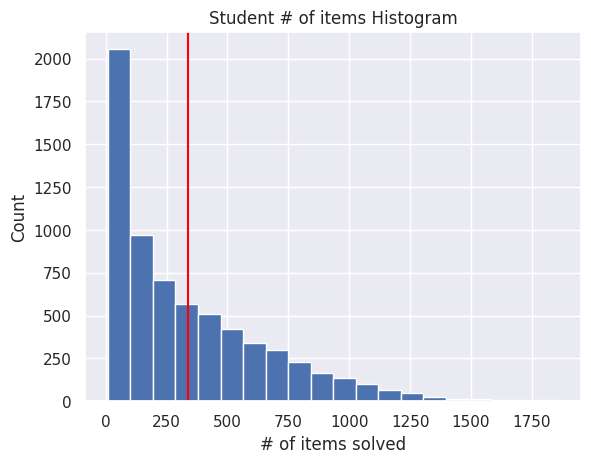

In [21]:
fig, ax = plt.subplots()

stu_groupby['assessmentItemID'].hist(bins=20, ax=ax)

ax.set_title('Student # of items Histogram')
ax.set_xlabel('# of items solved')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['assessmentItemID'].mean(), color='red')
ax.grid(visible=True)

---

#### 사용자 정답률 도수분포표

- 학생 별로 정답률이 어떻게 되는지
- 평균 62.8%, 최소 0.0%, 최대 100.0%, 중앙값 65.1%

    - 평균이 중앙값보다 낮다는 것은 일부 학생들이 상대적으로 낮은 점수를 받아 전체 평균을 떨어뜨렸음

    - 중앙값이 평균보다 높다는 것은 데이터 분포의 오른쪽에 상위 점수가 집중되어 있으며, 일부 학생들이 비교적 높은 점수를 받았음

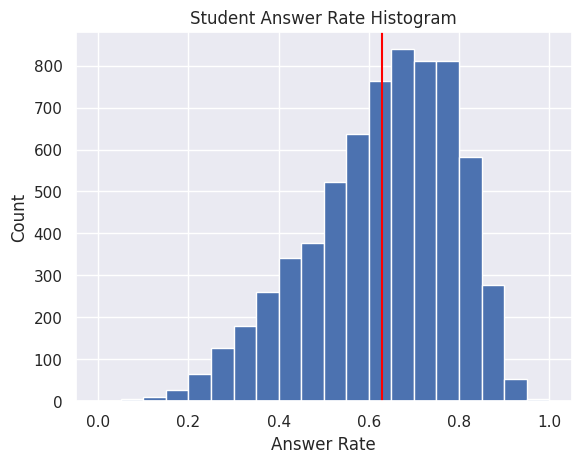

In [22]:
fig, ax = plt.subplots()

stu_groupby['answerCode'].hist(bins=20)

ax.set_title('Student Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['answerCode'].mean(), color='red')
ax.grid(visible=True)

#### 문항 별 정답률 분석

- 문항들의 정답률 추이가 어떻게 되는지, 평균 65.4%, 최소 4%, 최대 99.67%

- 문항별 정답률 최소 평균 차이가 나는것을 확인, 정답률을 근거로 간접적으로 문항 난이도 피처 생성 

In [23]:
prob_groupby = df.groupby('assessmentItemID').agg({
    'userID': 'count',
    'answerCode': percentile
})
prob_groupby.describe()

,userID,answerCode
count,9454.000000,9454.000000
mean,239.748889,0.654256
std,71.893791,0.195488
min,43.000000,0.049430
25%,220.000000,0.505548
50%,230.000000,0.666667
75%,271.000000,0.820513
max,454.000000,0.996310


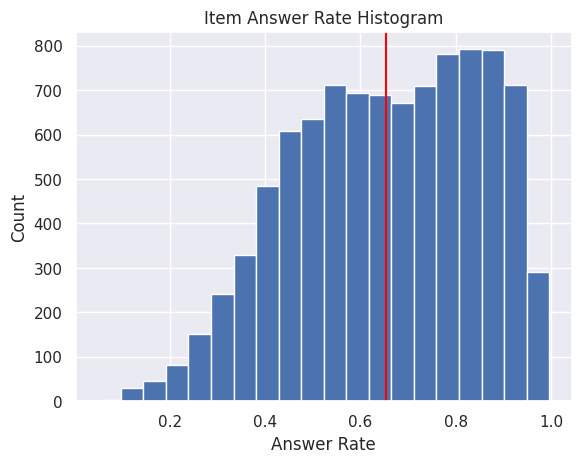

In [24]:
fig, ax = plt.subplots()
prob_groupby['answerCode'].hist(bins=20)
ax.set_title('Item Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(prob_groupby['answerCode'].mean(), color='red')
ax.grid(visible=True)

---

### 시험지 별 정답률 분석

- 시험지 별로 정답률이 어떻게 되는지
- 평균 62.8%, 최소 0.0%, 최대 100.0%, 중앙값 65.1%

In [25]:
test_groupby = df.groupby('testId').agg({
    'userID': 'count',
    'answerCode': percentile
})
test_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


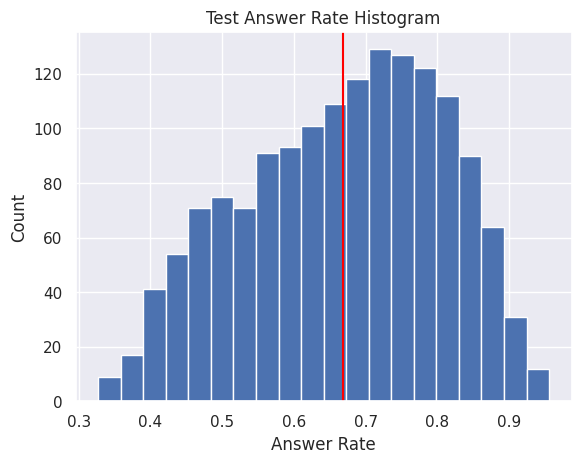

In [26]:
fig, ax = plt.subplots()
test_groupby['answerCode'].hist(bins=20)
ax.set_title('Test Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(test_groupby['answerCode'].mean(), color='red')
ax.grid(visible=True)

---

## 3. 일반적인 EDA

### 문항을 더 많이 푼 학생이 문제를 더 맞추는가?
분포도 위에 전반적인 동향을 살피고 싶을 때 `seaborn` 라이브러리의 `lmplot`을 사용하면 좋습니다.


- X축은 학생이푼 문항의수, Y축은 그에 따른 학생의 정답률입니다.

- 문항의 수와 학생의 정답률에는 0.171의 상관계수를 가집니다

- 상관 계수가 모든 것을 설명해주진 않습니다

Text(0.5, 1.0, '# of Questions - Answer Rate')

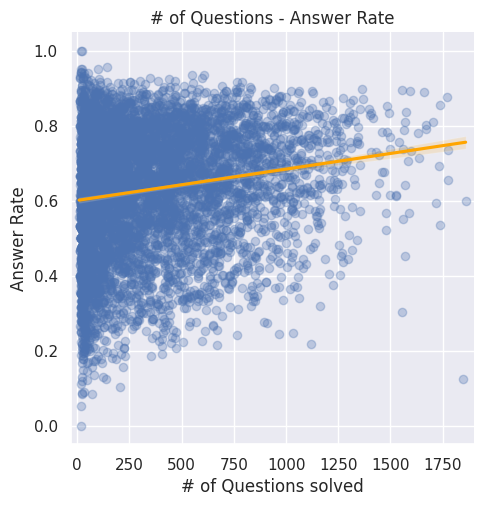

In [27]:
g = sns.lmplot(
    data=stu_groupby,
    x='assessmentItemID',
    y='answerCode',
    scatter_kws={'alpha':0.3},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Questions solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 1900))

ax = plt.gca()
ax.set_title('# of Questions - Answer Rate')

In [28]:
# 상관관계는 특성 간 인과를 알려주지 않지만 어느 정도 살펴보기는 해야하는 지표입니다.
print(f"정답률과 문제를 푼 개수 사이 인과관계: {stu_groupby.corr()['assessmentItemID']['answerCode']:.3f}")

정답률과 문제를 푼 개수 사이 인과관계: 0.168


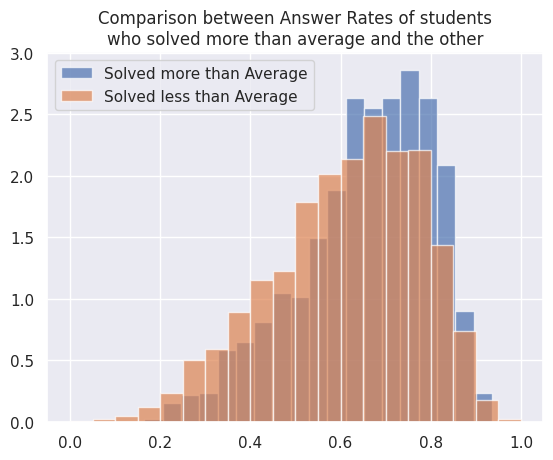

In [29]:
fig, ax = plt.subplots()

ax.set_title('Comparison between Answer Rates of students\nwho solved more than average and the other')
stu_num_mean = stu_groupby['assessmentItemID'].mean()
stu_groupby[stu_groupby['assessmentItemID'] >= stu_num_mean]['answerCode'].hist(
    bins=20, ax=ax, alpha=0.7, stacked=True, density=1, label='Solved more than Average'
)
stu_groupby[stu_groupby['assessmentItemID'] < stu_num_mean]['answerCode'].hist(
    bins=20, ax=ax, alpha=0.7, stacked=True, density=1, label='Solved less than Average'
)
ax.legend()

- 아래 그래프는, 평균 (339문항) 이상으로 문항을 푼 학생들과, 그 이하로 문항을 푼 학생들의 정답률 분포도입니다.

- 실제로 문항을 평균보다 더 많이 푼 학생들중에 정답률이 더 높은 학생이 많이 분포함을 확인할 수 있습니다.

### 더 많이 노출된 태그가 정답률이 더 높은가?

- 각 태그가 정보를 담고 있는지 알지는 못하지만, 태그와 정답률 사이 어떤 모종의 관계가 있을 지 생각해볼 수 있습니다.

- 만약에 학생들에게 더 많이 노출된 태그가 더 쉬운 문항 이어서, 정답률이 높다거나 하는 등의 막연한 추론을 시작으로 태그와 정답률 사이 관계를 분석해봅시다.

In [30]:
tag_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count',
    'answerCode': percentile
})
tag_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


In [31]:
# 태그별 유저수, 정답률

tag_groupby

,userID,answerCode
KnowledgeTag,,
23,1800,0.584444
24,358,0.614525
25,92,0.858696
26,2432,0.614309
30,539,0.536178
...,...,...
11253,4282,0.739374
11265,454,0.676211
11269,2417,0.557716


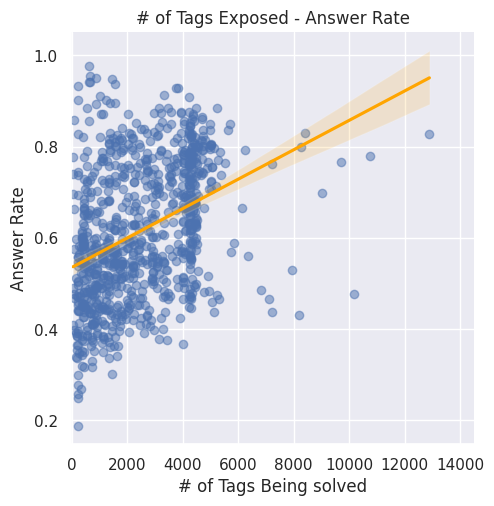

In [32]:
g = sns.lmplot(
    data=tag_groupby,
    x='userID',
    y='answerCode',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 14500))

ax = plt.gca()
ax.set_title('# of Tags Exposed - Answer Rate');

In [33]:
print(f"태그를 풀었던 사용자의 수와 정답률 사이 상관관계: {tag_groupby.corr()['answerCode']['userID']:.3f}")

태그를 풀었던 사용자의 수와 정답률 사이 상관관계: 0.376


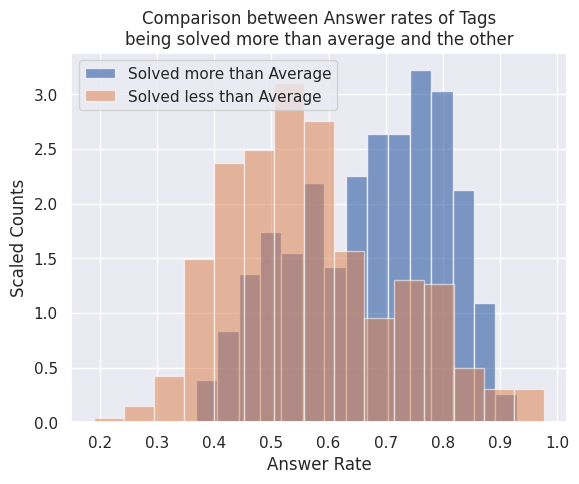

In [34]:
fig, ax = plt.subplots()

tag_ans_mean = tag_groupby['userID'].mean()
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Scaled Counts')
ax.set_title('Comparison between Answer rates of Tags\nbeing solved more than average and the other')

tag_groupby[tag_groupby['userID'] >= tag_ans_mean]['answerCode'].hist(
    ax=ax, alpha=0.7, bins=15, density=1, stacked=True, label='Solved more than Average'
)
tag_groupby[tag_groupby['userID'] < tag_ans_mean]['answerCode'].hist(
    ax=ax, alpha=0.55, bins=15, density=1, stacked=True, label='Solved less than Average'
)
ax.legend()

- 태그의 평균 노출 횟수를 기준으로 더 많이/적게 노출된 태그들의 정답률 분포표입니다.
- 확실히 더 많이 노출된 태그들이 정답률이 높은것을 확인 할 수 있네요.

### 문항을 풀수록 실력이 늘어나는가?

In [35]:
# 누적합
_cumsum = df.loc[:, ['userID', 'answerCode']].groupby('userID').agg({'answerCode': 'cumsum'})
# 누적갯수
_cumcount = df.loc[:, ['userID', 'answerCode']].groupby('userID').agg({'answerCode': 'cumcount'}) + 1

cum_ans = _cumsum / _cumcount
cum_ans['userID'] = df['userID']
window_sizes = [30, 70, 100, 120]

푼 문항의 갯수가 중앙값 부근인 10명의 학생들

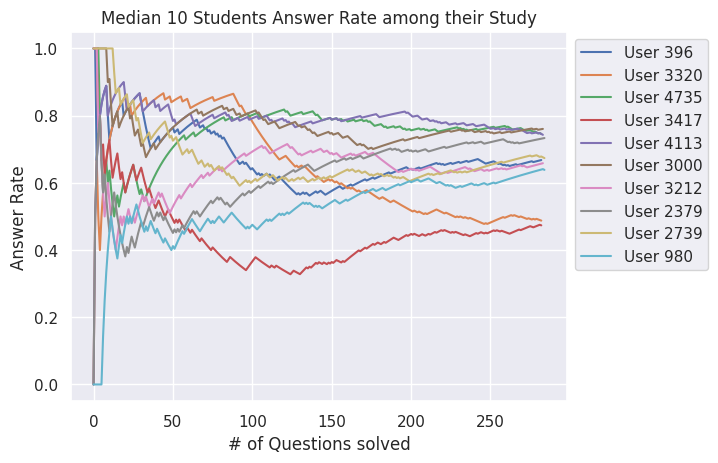

In [36]:
fig, ax = plt.subplots()
ax.set_title('Median 10 Students Answer Rate among their Study')
ax.set_xlabel('# of Questions solved')
ax.set_ylabel('Answer Rate')

samples = df.groupby('userID').agg({'assessmentItemID': 'count'}).sort_values(by='assessmentItemID').index[7442//2-5:7442//2+5]
for idx in samples:
    cum_ans[cum_ans['userID'] == idx]['answerCode'].reset_index(drop=True).plot(ax=ax, label=f'User {idx}')
ax.legend(bbox_to_anchor=(1, 1))

정답률이 중앙값 부근인 10명의 학생들

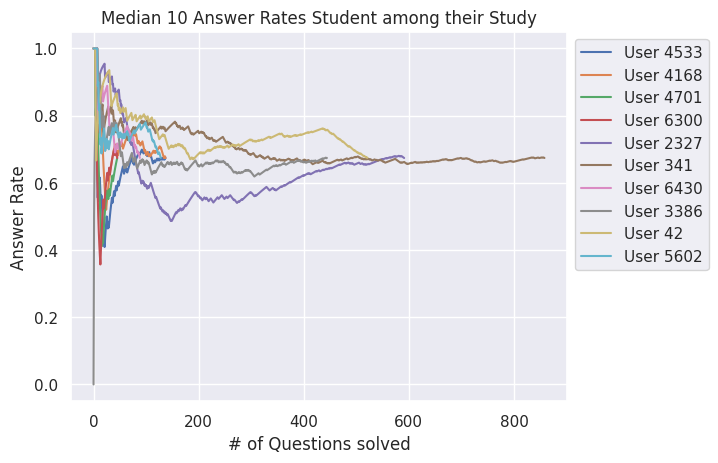

In [37]:
fig, ax = plt.subplots()
ax.set_title('Median 10 Answer Rates Student among their Study')
ax.set_xlabel('# of Questions solved')
ax.set_ylabel('Answer Rate')

samples = df.groupby('userID').agg({'answerCode': percentile}).sort_values(by='answerCode').index[7442//2-5:7442//2+5]
for idx in samples:
    cum_ans[cum_ans['userID'] == idx]['answerCode'].reset_index(drop=True).plot(ax=ax, label=f'User {idx}')
ax.legend(bbox_to_anchor=(1, 1))

Window_size 적용

In [38]:
def plot_rolled_answerrate(userID, ax, window_sizes=[70, 100, 120]):
    
    ax.set_title(f'Students Answer Rate among their Study - User {userID}')
    ax.set_xlabel('# of Questions solved')
    ax.set_ylabel('Answer Rate')

    cum_ans[cum_ans['userID'] == userID]['answerCode'].reset_index(drop=True).plot(
        ax=ax, label=f'Without Window', linewidth=3)

    for wdw_sz in window_sizes:    
        (df[df.userID == userID]['answerCode'].rolling(wdw_sz).sum().reset_index(drop=True) / wdw_sz).plot(
            ax=ax, label=f'Window size {wdw_sz}', alpha=0.8)

    ax.legend()

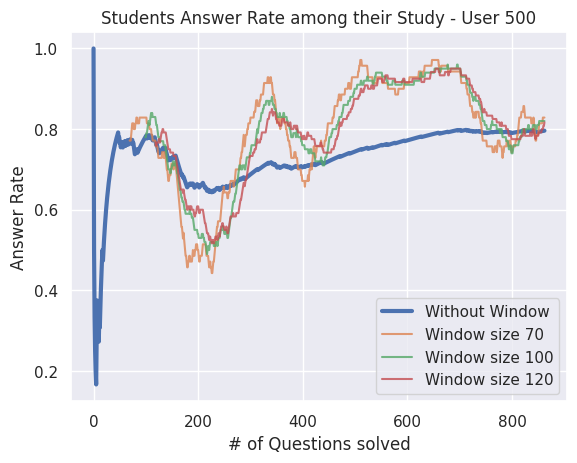

In [39]:
fig, ax = plt.subplots()
plot_rolled_answerrate(500, ax)

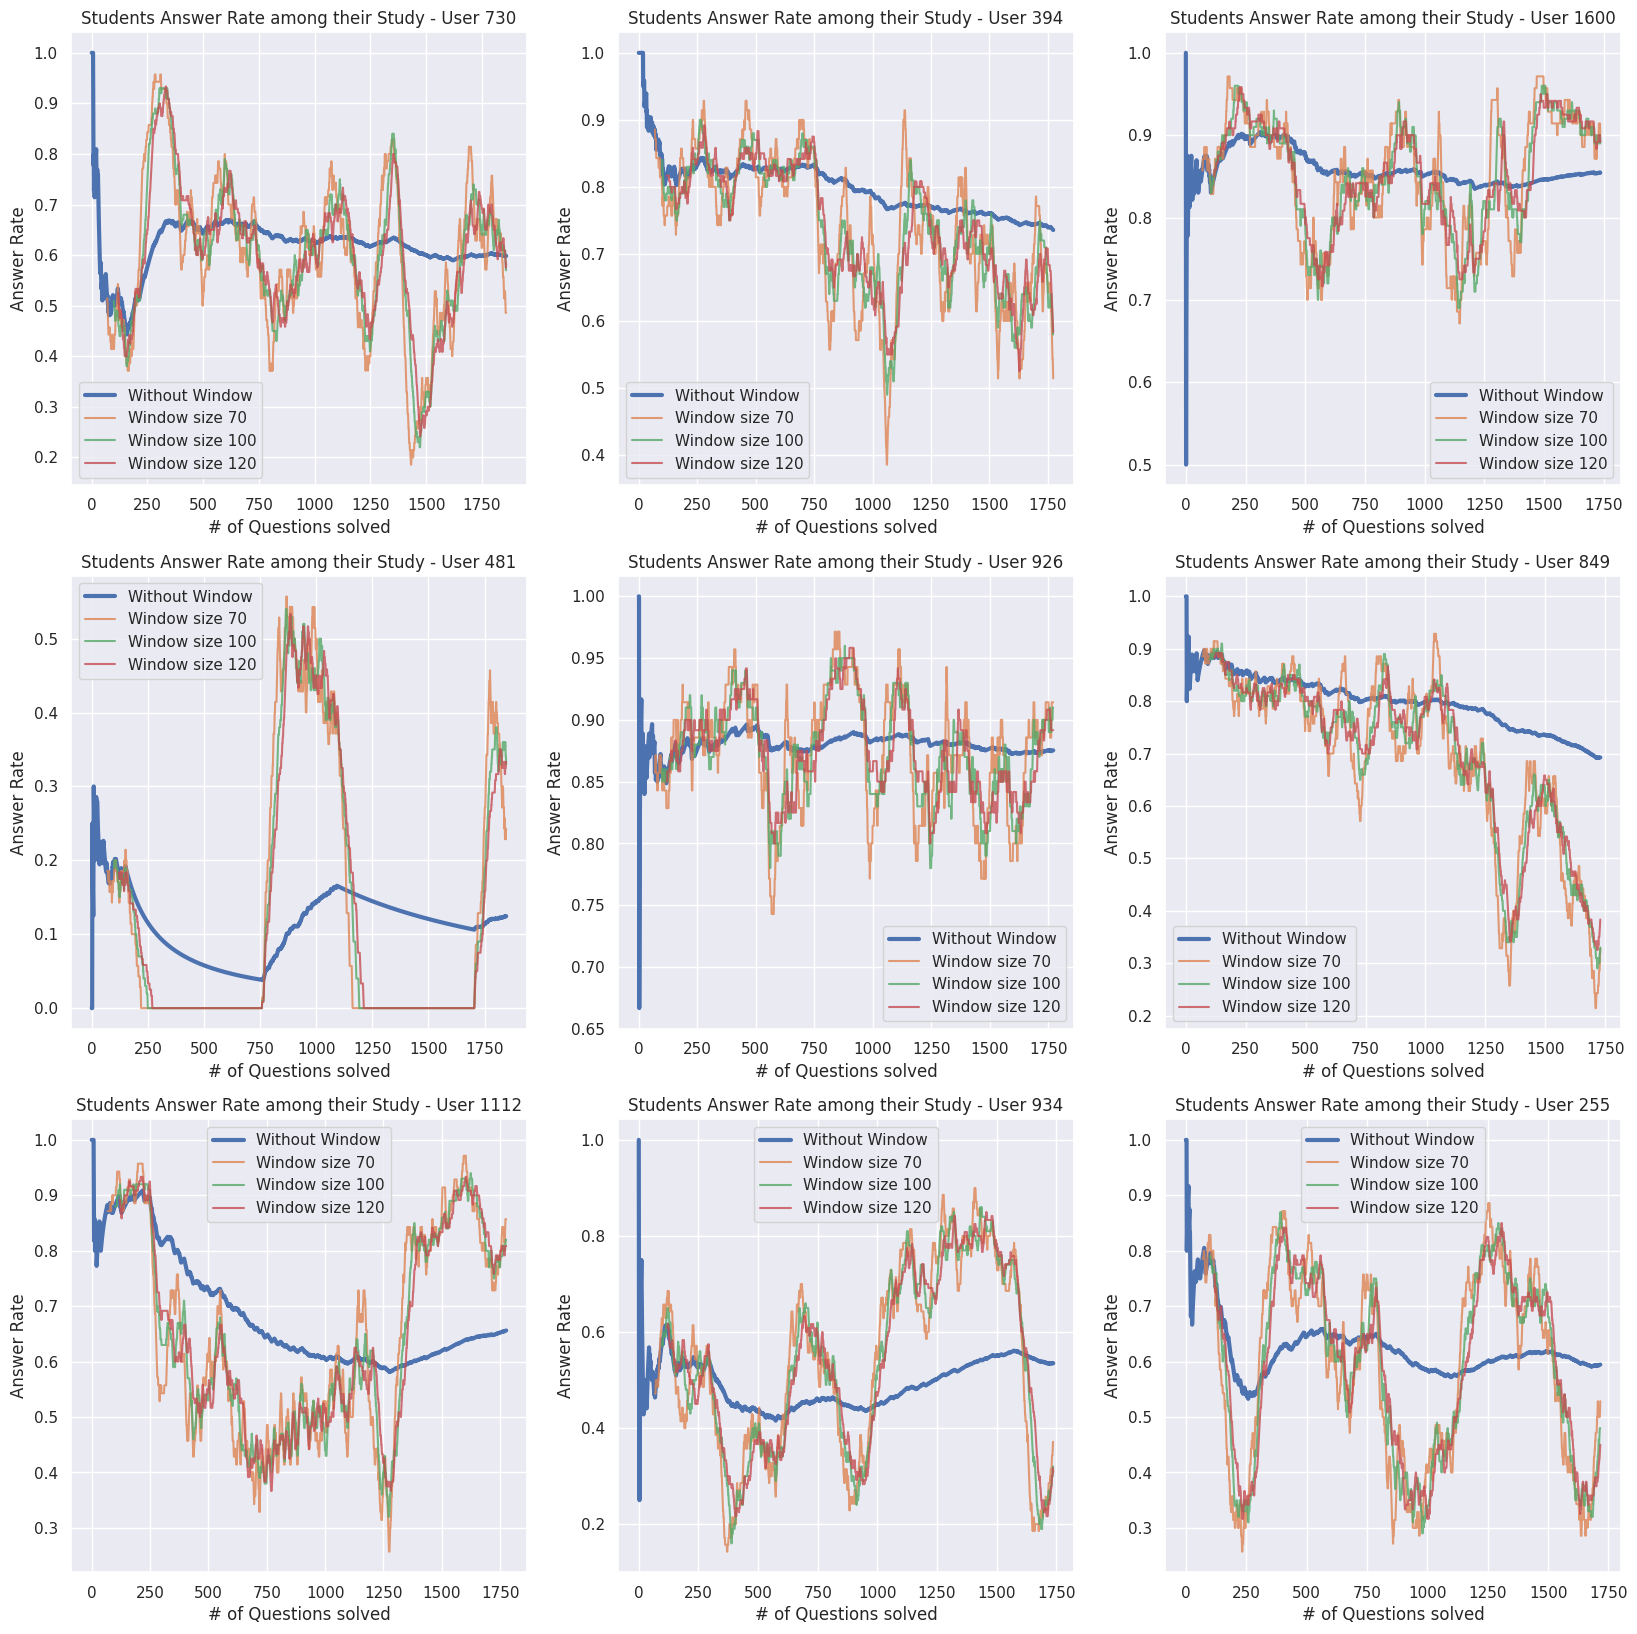

In [40]:
idx = df.groupby('userID').agg({'answerCode': 'count'}).sort_values(by='answerCode', ascending=False).iloc[:9].index
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
plt.title('Top 9 Students who solved the most problems')
for i, userID in enumerate(idx):
    
    r, c = i%3, i//3
    plot_rolled_answerrate(userID, axes[r, c])

### 문항을 푸는 데 걸린 시간과 정답률 사이의 관계는?

In [41]:
diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().fillna(pd.Timedelta(seconds=0))
diff = diff.fillna(pd.Timedelta(seconds=0))
diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

df['elapsed'] = diff

elapsed_answer = df.groupby('elapsed').agg({'answerCode': percentile, 'userID': 'count'})
elapsed_hist = elapsed_answer[elapsed_answer['userID'] > 100]

(-10.0, 650.0)

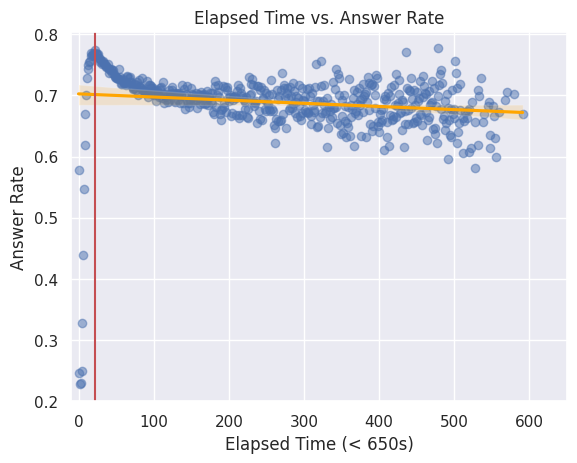

In [42]:
fig, ax = plt.subplots()
g = sns.regplot(x=elapsed_hist.index[:-1], y=elapsed_hist.answerCode.values[:-1],
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ax=ax)
ax.set_title('Elapsed Time vs. Answer Rate')
ax.set_xlabel('Elapsed Time (< 650s)')
ax.set_ylabel('Answer Rate')
ax.axvline(22, color='r')
ax.set_xlim(-10, 650)

## 4. 평균을 이용한 그래프 


- 같은 문항수를 푼 학생들이 있다면, 그 학생들의 평균을 찍어서 그래프를 그려봅시다. 

- 9문항을 푼 학생들의 평균과 200 문제를 푼 학생들의 평균을 비교하여 EDA

- **x-axis**: 사용자가 푼 문항의 수
- **y-axis**: 정답률   
<br>
![image.png](mission_a.png)

In [44]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}

df = pd.read_csv('/data/ephemeral/data/train_data.csv', dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 3.95 s, sys: 460 ms, total: 4.41 s
Wall time: 4.41 s


In [45]:
def percentile(s):
    return np.sum(s) / len(s)

In [46]:
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


In [47]:
itemnum_ans = stu_groupby.groupby('assessmentItemID').mean()
itemnum_ans['num_items'] = itemnum_ans.index

Text(0, 0.5, 'Answer Rate')

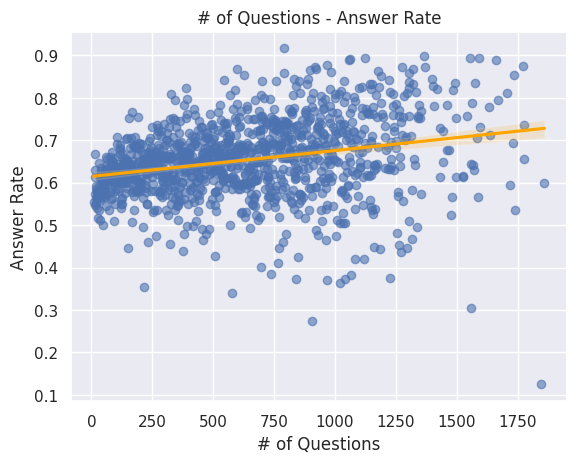

In [48]:
fig, ax = plt.subplots()
sns.regplot(data=itemnum_ans, x='num_items', y='answerCode',
           line_kws={"color": "orange"}, scatter_kws={'alpha':0.6}, ax=ax)

ax.set_title('# of Questions - Answer Rate')
ax.set_xlabel('# of Questions')
ax.set_ylabel('Answer Rate')

### 평균 bin을 이용한 그래프


단순히 같은 문항수를 푼 학생들끼리 평균을 집계하는 것이 아니라, 어느 정도 비슷한 문항을 푼 학생들을 전부 집계하면 좋을 것 같네요. 

예를 들면 9 ~ 14문항을 푼 학생들을 묶어서 평균을 내는 것처럼요.   

`bins` 값을 주었을 때 bins 만큼 그래프에 점이 찍히도록, 예를 들어 bins=300이었다면 아래와 같이 300개의 bin을 만들어서 그래프가 그려지도록 해주세요 :)    

![image.png](mission_b.png)

In [49]:
itemnum_ans = stu_groupby.groupby('assessmentItemID').mean()
bins = 300
itemnum_ans['bins'] = pd.cut(
    itemnum_ans.index,
    [i * (itemnum_ans.index.max() - itemnum_ans.index.min()) // bins for i in range(bins)]
)

In [50]:
itemnum_ans = itemnum_ans.groupby('bins').mean()
itemnum_ans['mid'] = list(map(lambda x: (x.left + x.right)//2, itemnum_ans.index))

/tmp/ipykernel_116403/894362937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  itemnum_ans = itemnum_ans.groupby('bins').mean()


Text(0, 0.5, 'Answer Rate')

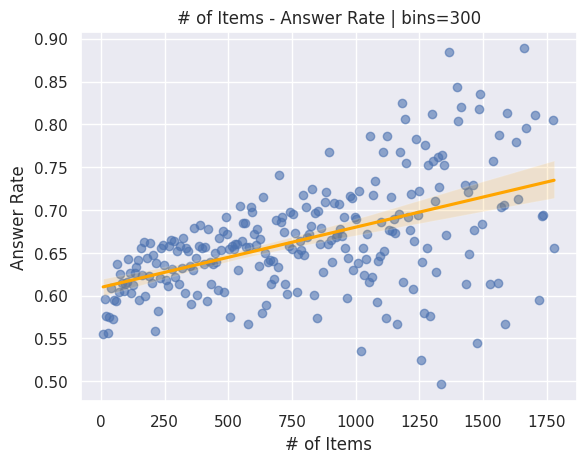

In [51]:
fig, ax = plt.subplots()
sns.regplot(data=itemnum_ans, x='mid', y='answerCode',
           line_kws={"color": "orange"}, scatter_kws={'alpha': 0.6}, ax=ax)

ax.set_title(f'# of Items - Answer Rate | bins={bins}')
ax.set_xlabel('# of Items')
ax.set_ylabel('Answer Rate')